<a href="https://colab.research.google.com/github/BeesuVarshini/FaceMaskDetectionCNN/blob/main/Face_Mask_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Importing Face Mask dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:01<00:00, 79.0MB/s]
100% 163M/163M [00:01<00:00, 104MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2170.jpg', 'with_mask_276.jpg', 'with_mask_3104.jpg', 'with_mask_44.jpg', 'with_mask_1377.jpg']
['with_mask_3355.jpg', 'with_mask_2239.jpg', 'with_mask_1314.jpg', 'with_mask_2795.jpg', 'with_mask_2647.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1912.jpg', 'without_mask_1842.jpg', 'without_mask_358.jpg', 'without_mask_2099.jpg', 'without_mask_2713.jpg']
['without_mask_2343.jpg', 'without_mask_3182.jpg', 'without_mask_3685.jpg', 'without_mask_2570.jpg', 'without_mask_1122.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828




Creating Labels for the two class of Images

with mask --> 1

without mask --> 0


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

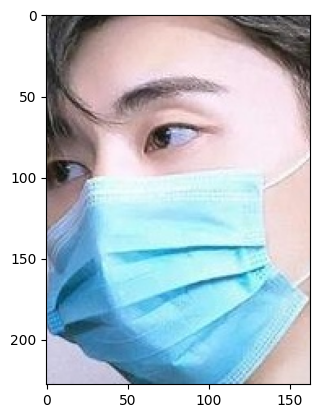

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

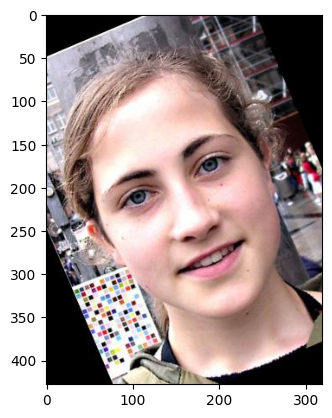

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1433.jpg')
imgplot = plt.imshow(img)
plt.show()



Image Processing

   1. Resize the Images

   2. Convert the images to numpy arrays



In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
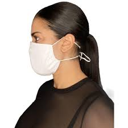

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 73,  47,  32],
        [ 96,  73,  58],
        [ 86,  64,  52],
        ...,
        [ 60,  40,  41],
        [ 48,  28,  29],
        [ 47,  28,  29]],

       [[ 92,  69,  53],
        [ 92,  69,  56],
        [ 82,  60,  49],
        ...,
        [ 73,  51,  53],
        [ 59,  38,  39],
        [ 46,  26,  27]],

       [[104,  82,  68],
        [ 75,  54,  42],
        [ 87,  66,  56],
        ...,
        [ 73,  48,  51],
        [ 68,  44,  47],
        [ 54,  33,  35]],

       ...,

       [[225, 229, 242],
        [227, 232, 244],
        [226, 230, 243],
        ...,
        [ 52,  52,  67],
        [ 51,  49,  64],
        [ 50,  48,  61]],

       [[232, 234, 246],
        [232, 232, 244],
        [230, 230, 243],
        ...,
        [ 94,  96, 123],
        [ 84,  86, 111],
        [ 74,  77,  99]],

       [[238, 237, 252],
        [237, 234, 250],
        [235, 232, 248],
        ...,
        [151, 156, 187],
        [147, 151, 180],
        [137, 142, 168]]], dtype=uint8)
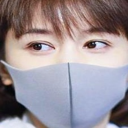

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.28627451, 0.18431373, 0.1254902 ],
        [0.37647059, 0.28627451, 0.22745098],
        [0.3372549 , 0.25098039, 0.20392157],
        ...,
        [0.23529412, 0.15686275, 0.16078431],
        [0.18823529, 0.10980392, 0.11372549],
        [0.18431373, 0.10980392, 0.11372549]],

       [[0.36078431, 0.27058824, 0.20784314],
        [0.36078431, 0.27058824, 0.21960784],
        [0.32156863, 0.23529412, 0.19215686],
        ...,
        [0.28627451, 0.2       , 0.20784314],
        [0.23137255, 0.14901961, 0.15294118],
        [0.18039216, 0.10196078, 0.10588235]],

       [[0.40784314, 0.32156863, 0.26666667],
        [0.29411765, 0.21176471, 0.16470588],
        [0.34117647, 0.25882353, 0.21960784],
        ...,
        [0.28627451, 0.18823529, 0.2       ],
        [0.26666667, 0.17254902, 0.18431373],
        [0.21176471, 0.12941176, 0.1372549 ]],

       ...,

       [[0.88235294, 0.89803922, 0.94901961],
        [0.89019608, 0.90980392, 0.95686275],
        [0.88627451, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=3)

Epoch 1/3
170/170 [==============================] - 131s 769ms/step - loss: 0.2057 - acc: 0.9218 - val_loss: 0.1690 - val_acc: 0.9322
Epoch 2/3
170/170 [==============================] - 129s 757ms/step - loss: 0.1585 - acc: 0.9391 - val_loss: 0.1629 - val_acc: 0.9306
Epoch 3/3
170/170 [==============================] - 129s 760ms/step - loss: 0.1402 - acc: 0.9443 - val_loss: 0.1667 - val_acc: 0.9372


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 219ms/step - loss: 0.2065 - acc: 0.9239
Test Accuracy = 0.9238914847373962


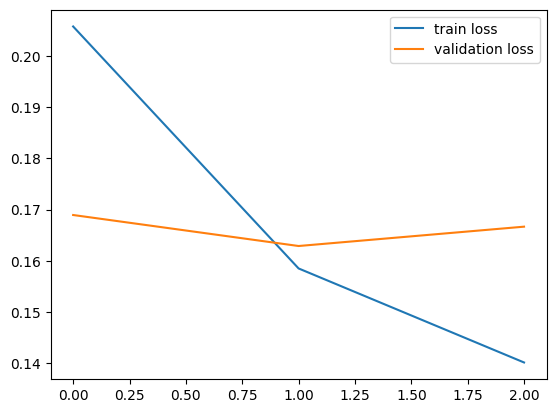

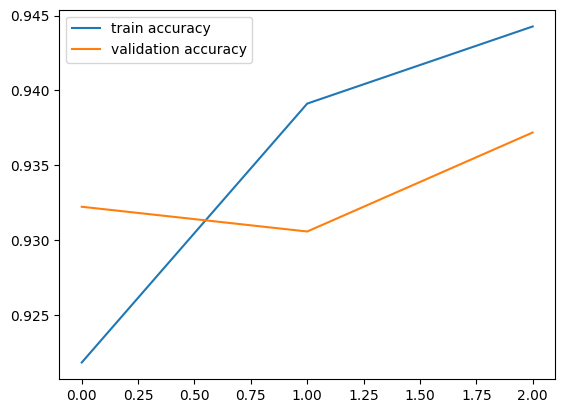

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/without_mask/without_mask_1.jpg


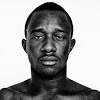

1/1 [==============================] - 0s 30ms/step
[[0.56688786 0.1916143 ]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


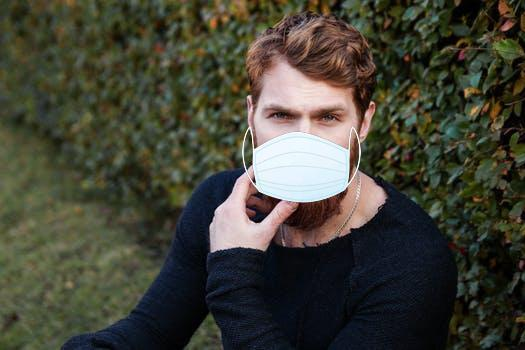

1/1 [==============================] - 0s 49ms/step
[[0.25285023 0.7141884 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:
 print('The person in the image is not wearing a mask')